# Comparison of results and choice of hyper_params. 


In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import numpy as np
import SimpleMachine as sm
import SimpleLoss as sl
import Data as dt
import pickle
import matplotlib.pyplot as plt
import time
import datetime
from pydmd import DMD
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow import keras
from plot_fun import new_plot_model


plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.facecolor'] = 'white'
%matplotlib inline

# Step 1: Read in a random test batch. 

In [41]:
random_batch1 = pickle.load(open('ex1_random_batch.pkl', 'rb'))
random_batch1  = random_batch1.numpy()


random_batch2 = pickle.load(open('random_batch_ex1_101_ts.pkl', 'rb'))
random_batch2  = random_batch2.numpy()

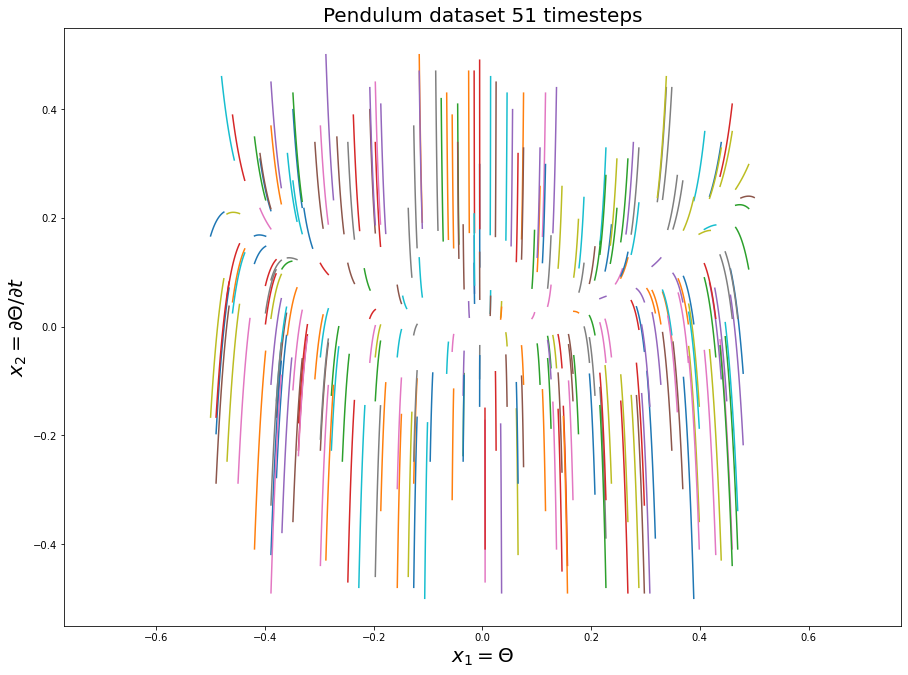

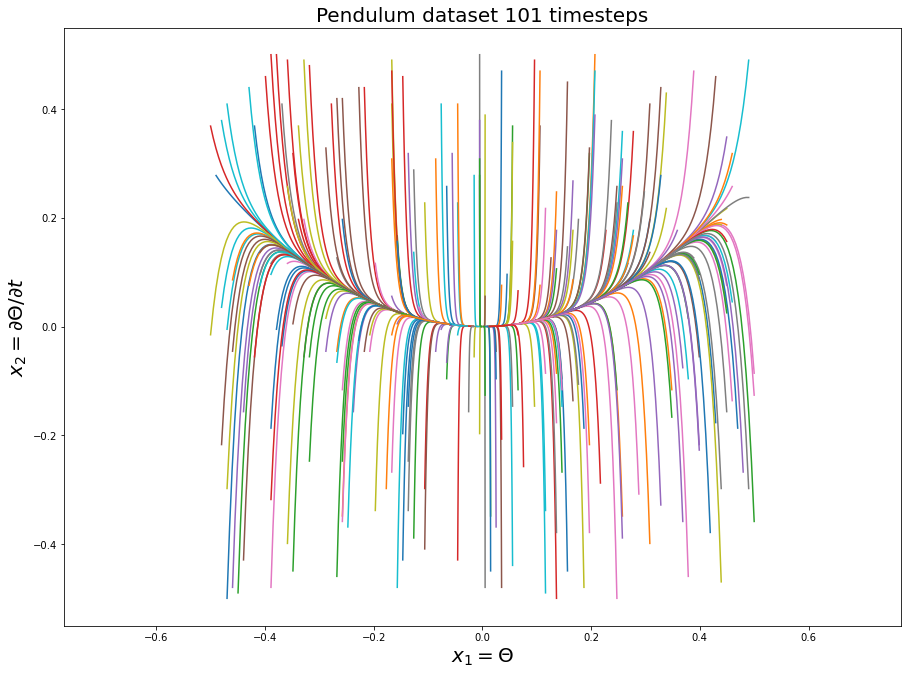

In [42]:
_ = plt.figure(figsize=(15,11))
for ii in np.arange(0, 256, 1):
    plt.plot(random_batch1[ii, 0, :], random_batch1[ii, 1, :])
plt.xlabel("$x_{1} = \Theta $", fontsize=20)
plt.ylabel("$x_{2}= \partial \Theta /\partial t $", fontsize=20)
plt.title("Pendulum dataset 51 timesteps", fontsize=20)
plt.axis("equal")
plt.show()


_ = plt.figure(figsize=(15,11))
for ii in np.arange(0, 256, 1):
    plt.plot(random_batch2[ii, 0, :], random_batch2[ii, 1, :])
plt.xlabel("$x_{1} = \Theta $", fontsize=20)
plt.ylabel("$x_{2}= \partial \Theta /\partial t$", fontsize=20)
plt.title("Pendulum dataset 101 timesteps", fontsize=20)
plt.axis("equal")
plt.show()



# Step 2: Load a saved model. 

In [43]:
# Network Hyper Parameters
hyp_params = dict()
hyp_params['num_t_steps'] = 251
hyp_params['num_phys_dims'] = 2
hyp_params['num_init_conds'] = 10000
hyp_params['batch_size'] = 256 # MAJOR PARAMETER CHOICE
hyp_params['num_epochs'] = 200  # MAJOR PARAMETER CHOICE

# Encoding/Decoding Layer Parameters
hyp_params['num_en_layers'] = 4 # MAJOR PARAMETER CHOICE
hyp_params['num_en_neurons'] = 32  # MAJOR PARAMETER CHOICE
hyp_params['latent_dim'] = 2

hyp_params['activation'] = 'elu'
hyp_params['weight_initializer'] = 'he_uniform'
hyp_params['bias_initializer'] = 'he_uniform'
hyp_params['regfac'] = 3e-3

hyp_params['c1'] = 1 # coefficient autoencoder loss
hyp_params['c2'] = 10 # coefficient of dmd loss. 
hyp_params['c3'] = 10 # dmd reconstruction weight. 


In [44]:

myMachine = sm.SimpleMachine(hyp_params)
print("DMD Loss on input dataset 51 timesteps= ", np.log10(myMachine.get_linearity_loss(tf.convert_to_tensor(random_batch1)).numpy()))

Amat, y_pred = myMachine.compute_pred_batch_mat(y_data_mat=tf.convert_to_tensor(random_batch1))

print("Pred Loss on input dataset 51 timesteps= ", np.log10(myMachine.pred_loss(tf.convert_to_tensor(random_batch1), y_pred).numpy()))

DMD Loss on input dataset 51 timesteps=  -9.651875
Pred Loss on input dataset 51 timesteps=  -4.5032009289678845


In [45]:

myMachine = sm.SimpleMachine(hyp_params)
print("DMD Loss on input dataset 51 timesteps= ", np.log10(myMachine.get_linearity_loss(tf.convert_to_tensor(random_batch2)).numpy()))

Amat, y_pred = myMachine.compute_pred_batch_mat(y_data_mat=tf.convert_to_tensor(random_batch2))

print("Pred Loss on input dataset 51 timesteps= ", np.log10(myMachine.pred_loss(tf.convert_to_tensor(random_batch2), y_pred).numpy()))

DMD Loss on input dataset 51 timesteps=  -9.200566
Pred Loss on input dataset 51 timesteps=  -3.914222059606749


In [46]:
myMachine.autoencoder = keras.models.load_model("my_model_ex1_oct21", compile=False)

In [47]:
test_run = myMachine(random_batch1)

## Step 3: plot results.

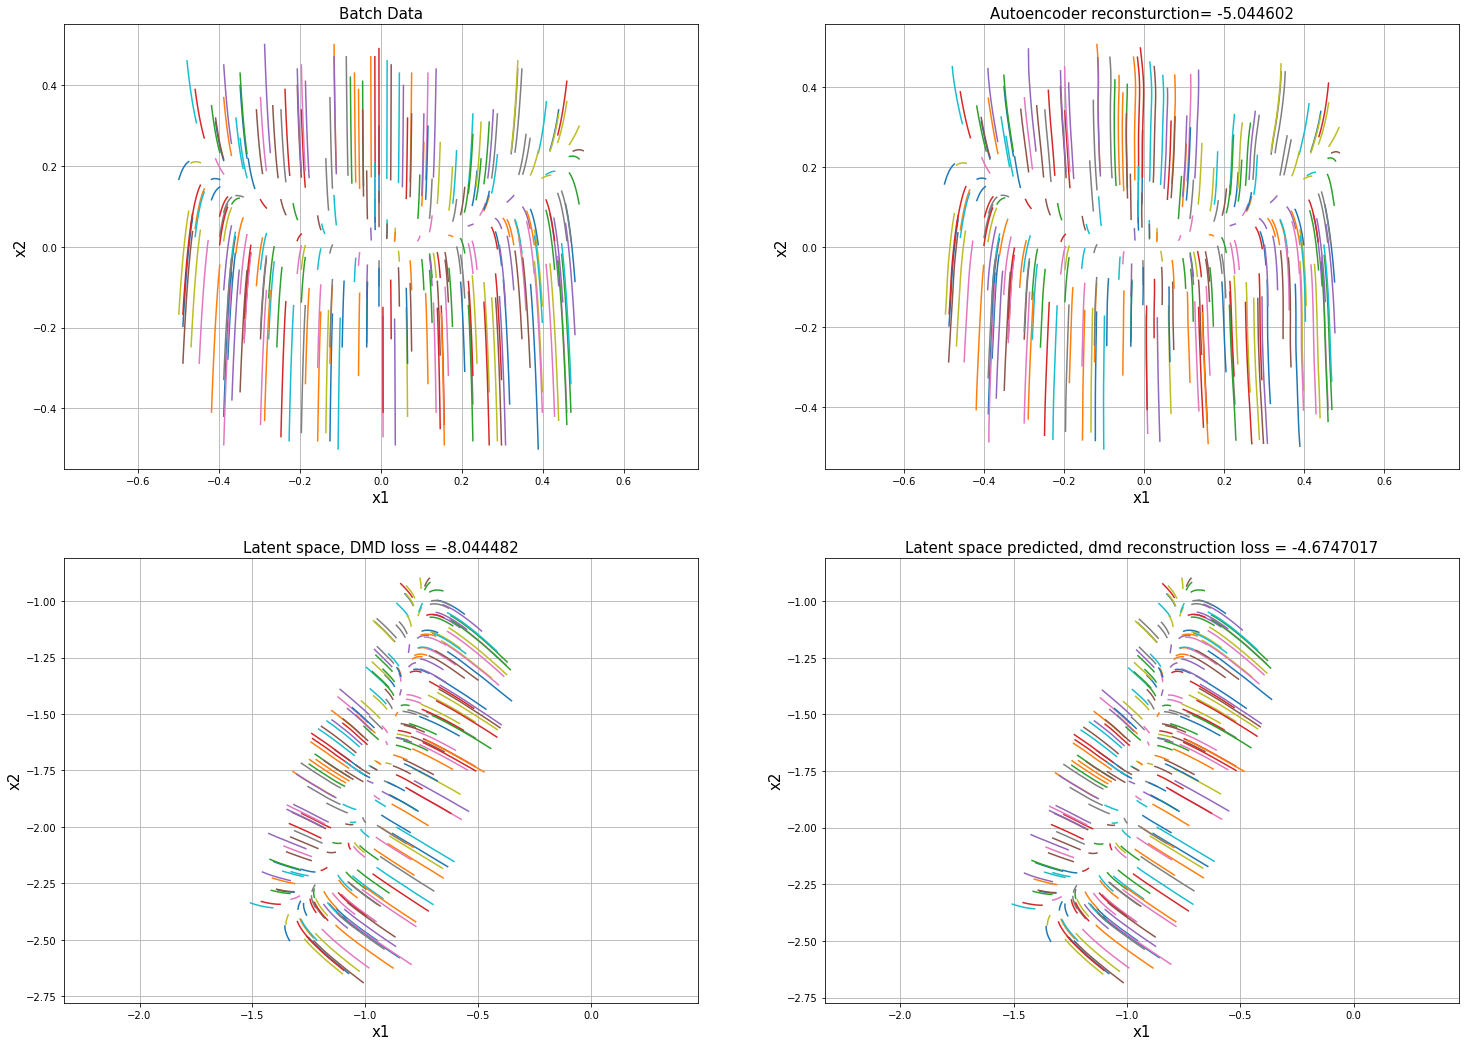

In [48]:
new_plot_model(test_run, random_batch1)

# Step 4: Repeat for all models saved. 

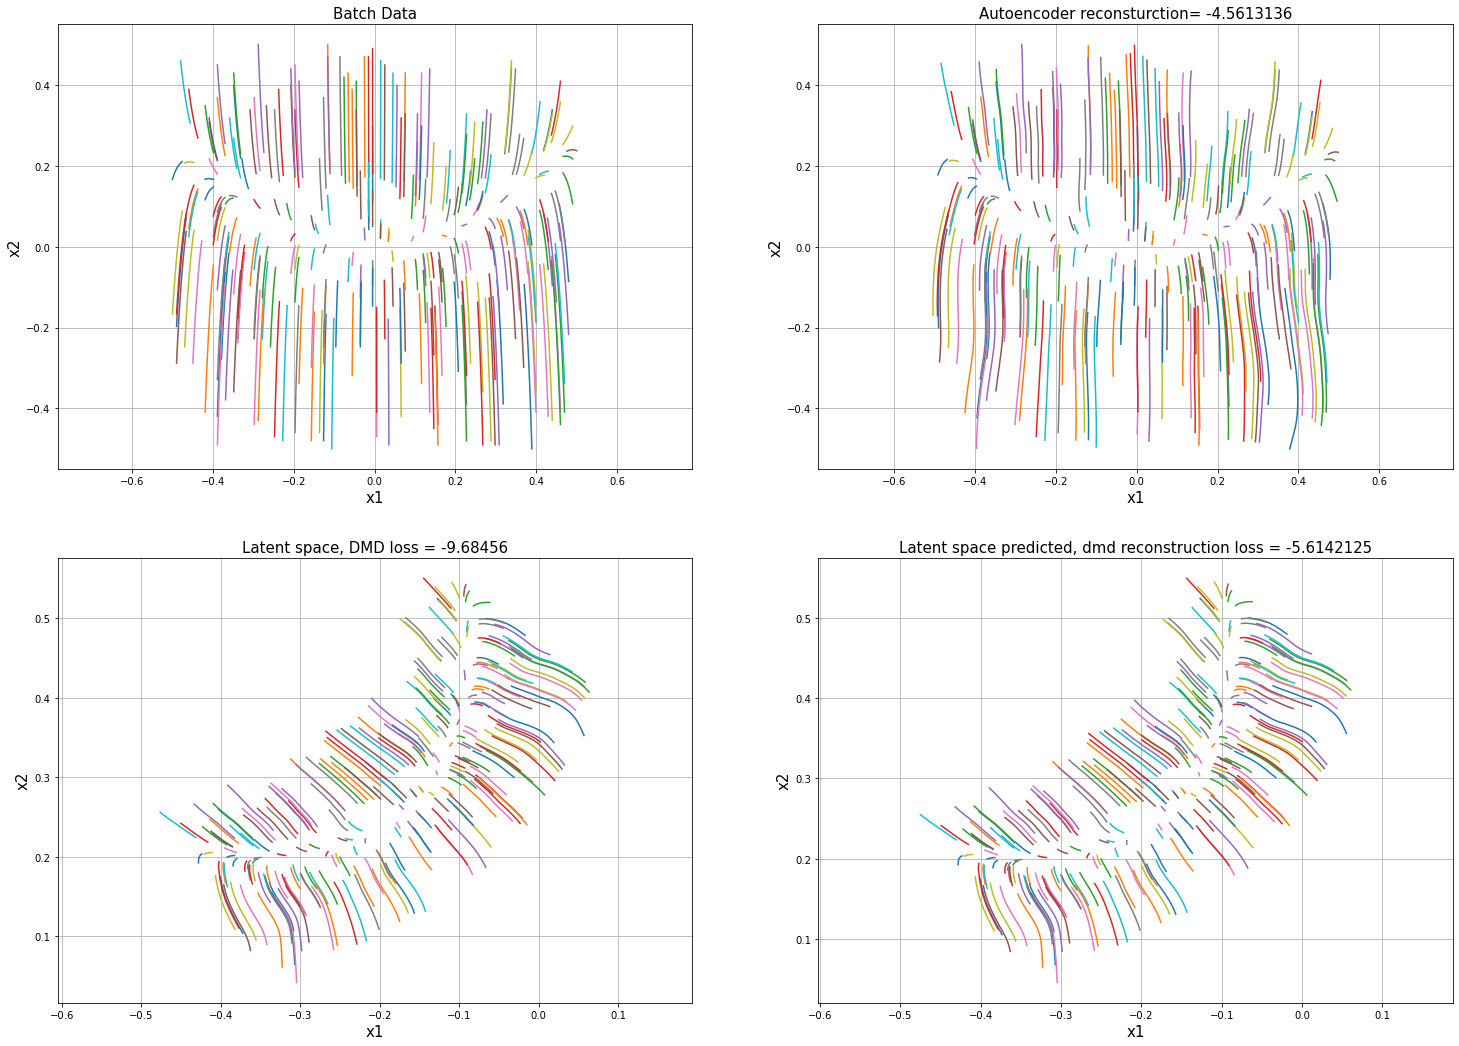

In [49]:
myMachine.autoencoder = keras.models.load_model("my_model_Ex1_oct22", compile=False)
test_run = myMachine(random_batch1)
new_plot_model(test_run, random_batch1)

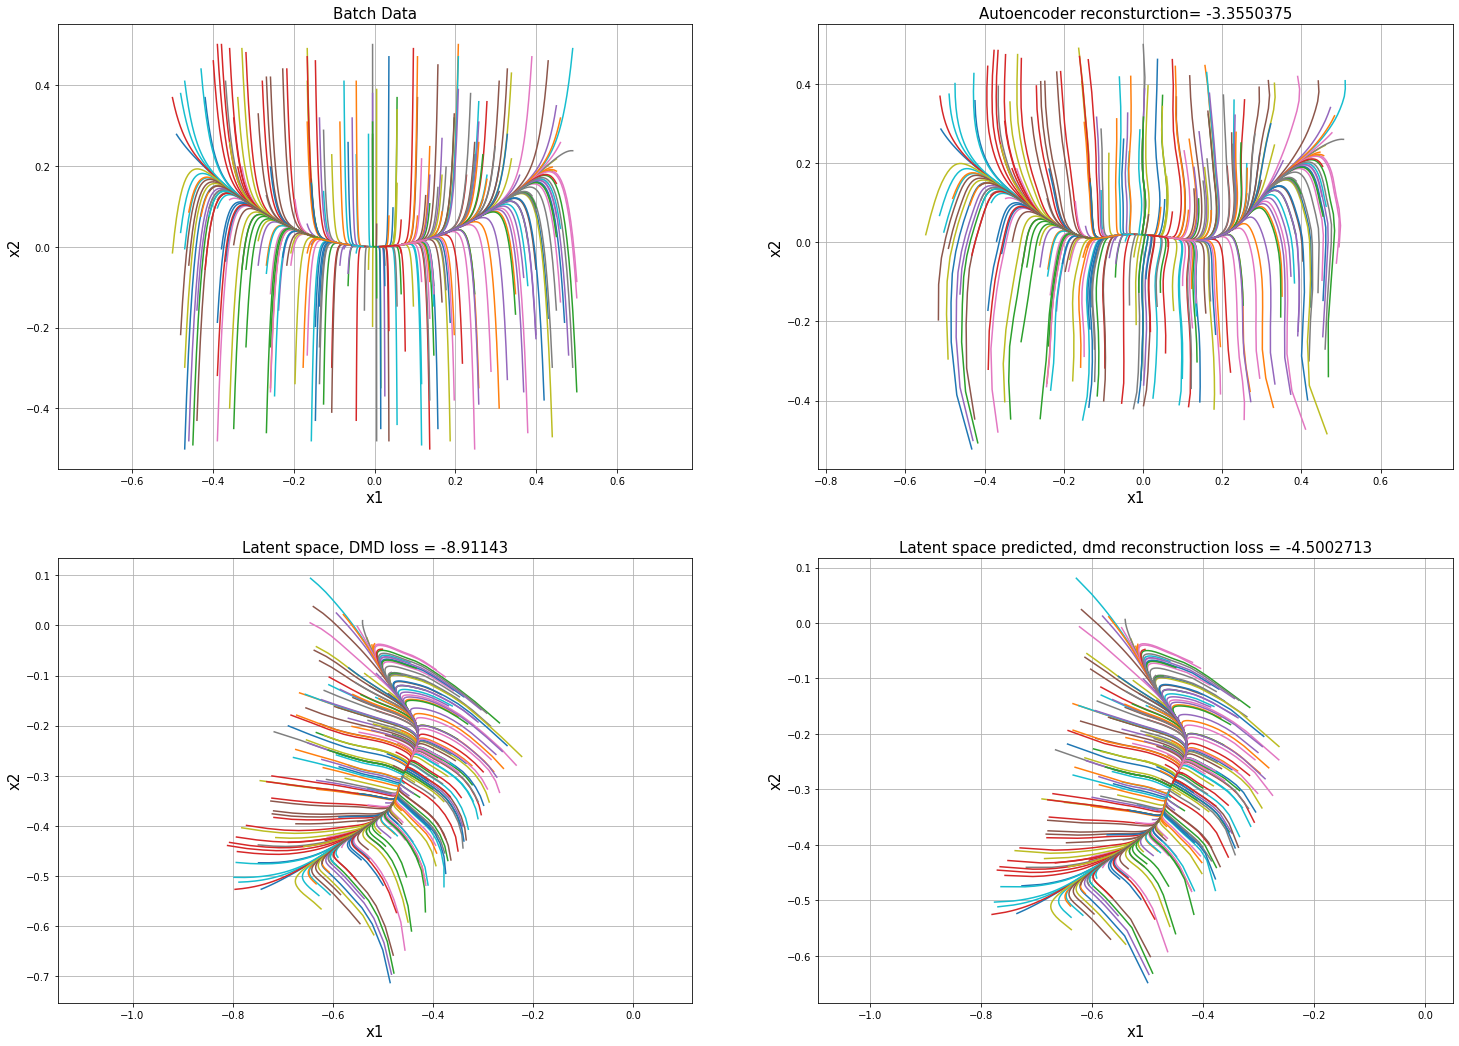

In [50]:
myMachine.autoencoder = keras.models.load_model("my_model_Ex1_oct23", compile=False)
test_run = myMachine(random_batch2)
new_plot_model(test_run, random_batch2)